<a href="https://colab.research.google.com/github/KirpaDmitriy/ParallelProgramming/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Сбор и анализ данных о прозводительности параллельных программ

In [ ]:
N1 = 325
N2 = 16700
DIVIDER = 10

d = (N2 - N1) / DIVIDER
print(f'Шаг по кол-ву элементов в массиве: {d}')

Шаг по кол-ву элементов в массиве: 1637.5


In [ ]:
N = list(map(int, [N1 + n * d for n in range(DIVIDER + 1)]))
print(f'Величины тестовых размеров массивов: {", ".join(map(str, N))}')

Величины тестовых размеров массивов: 325, 1962, 3600, 5237, 6875, 8512, 10150, 11787, 13425, 15062, 16700


Шаблон для заполнения:

`lab1_seq_vals = {
    325: [],
    1962: [],
    3600: [],
    5237: [],
    6875: [],
    8512: [],
    10150: [],
    11787: [],
    13425: [],
    15062: [],
    16700: [],
}`

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

import pandas as pd
import numpy as np

# Лаба 1

In [ ]:
def plot_performance(data: dict, baseline=None, n_threads=1):
  data_av = dict([(k, np.mean(v)) for (k, v) in data.items()])
  data_av = pd.DataFrame({'N': data_av.keys(), 'time, ms': data_av.values()})
  display(data_av)
  fig = px.bar(data_av, x='N', y='time, ms', text=data_av['time, ms'], title='Зависимость времени выполнения от кол-ва элементов в массиве')
  fig.show()

  if baseline is None:
    return data_av
  
  speed_up = {'N': [], 'k': []}
  for i, line in enumerate(data_av.values):
    speed_up['N'].append(line[0])
    speed_up['k'].append(baseline.iloc[i]['time, ms'] / line[-1])
  speed_up = pd.DataFrame(speed_up)
  display(speed_up)
  fig1 = px.bar(speed_up, x='N', y='k', text=speed_up.k, title='Параллельное ускорение')
  fig1.show()

  effectivness = speed_up.copy()
  effectivness.k = effectivness.k.apply(lambda el: el / n_threads)
  display(effectivness)
  fig2 = px.bar(effectivness, x='N', y='k', text=effectivness.k, title='Параллельная эффективность')
  fig2.show()

  return data_av, speed_up, effectivness

## Последовательно

In [ ]:
lab1_seq_vals = {
    325: [9, 6, 7],
    1962: [91, 90, 96, 96],
    3600: [260, 281, 272, 273],
    5237: [562, 519, 542, 529],
    6875: [987, 929, 927, 931],
    8512: [1328, 1415, 1381, 1456],
    10150: [1933, 1986, 1972, 1878],
    11787: [2420, 2463, 2416, 2443],
    13425: [3392, 3429, 3270, 3331],
    15062: [4055, 4089, 4228, 4359],
    16700: [5170, 5045, 5393, 5498, 5867],
}

lab1_seq_av = plot_performance(lab1_seq_vals)

,N,"time, ms"
0,325,7.333333
1,1962,93.250000
2,3600,271.500000
3,5237,538.000000
4,6875,943.500000
5,8512,1395.000000
6,10150,1942.250000
7,11787,2435.500000
8,13425,3355.500000
9,15062,4182.750000


## 1 поток

In [ ]:
lab1_1thread_vals = {
    325: [4, 5, 5, 7, 10],
    1962: [95, 96, 104, 92],
    3600: [262, 272, 270, 274],
    5237: [534, 536, 529, 546],
    6875: [959, 958, 959, 983],
    8512: [1457, 1409, 1414, 1403],
    10150: [1872, 2472, 2001, 1927, 1961],
    11787: [2670, 2817, 2696],
    13425: [2795, 3253, 3240, 3615],
    15062: [4321, 4343, 4495],
    16700: [5232, 5615],
}

lab1_par1_av, speed_up_par1, effectivness_par1 = plot_performance(lab1_1thread_vals, baseline=lab1_seq_av, n_threads=1)

,N,"time, ms"
0,325,6.200000
1,1962,96.750000
2,3600,269.500000
3,5237,536.250000
4,6875,964.750000
5,8512,1420.750000
6,10150,2046.600000
7,11787,2727.666667
8,13425,3225.750000
9,15062,4386.333333


,N,k
0,325.0,1.182796
1,1962.0,0.963824
2,3600.0,1.007421
3,5237.0,1.003263
4,6875.0,0.977974
5,8512.0,0.981876
6,10150.0,0.949013
7,11787.0,0.892888
8,13425.0,1.040223
9,15062.0,0.953587


,N,k
0,325.0,1.182796
1,1962.0,0.963824
2,3600.0,1.007421
3,5237.0,1.003263
4,6875.0,0.977974
5,8512.0,0.981876
6,10150.0,0.949013
7,11787.0,0.892888
8,13425.0,1.040223
9,15062.0,0.953587


## 2 потока

In [ ]:
lab1_2threads_vals = {
    325: [5, 8, 6, 5],
    1962: [94, 115, 108, 90],
    3600: [302, 416, 520, 323],
    5237: [575, 592, 594, 568],
    6875: [1012, 999, 1007, 1009],
    8512: [1465, 1441, 1460, 1703],
    10150: [2053, 2368, 2076, 2160],
    11787: [2661, 2734, 2859, 2380, 4426],
    13425: [3484, 3183, 3537],
    15062: [4441, 4778, 3848, 4474],
    16700: [5299],
}

lab1_par2_av, speed_up_par2, effectivness_par2 = plot_performance(lab1_2threads_vals, baseline=lab1_seq_av, n_threads=2)

,N,"time, ms"
0,325,6.000000
1,1962,101.750000
2,3600,390.250000
3,5237,582.250000
4,6875,1006.750000
5,8512,1517.250000
6,10150,2164.250000
7,11787,3012.000000
8,13425,3401.333333
9,15062,4385.250000


,N,k
0,325.0,1.222222
1,1962.0,0.916462
2,3600.0,0.695708
3,5237.0,0.924002
4,6875.0,0.937174
5,8512.0,0.919427
6,10150.0,0.897424
7,11787.0,0.808599
8,13425.0,0.986525
9,15062.0,0.953822


,N,k
0,325.0,0.611111
1,1962.0,0.458231
2,3600.0,0.347854
3,5237.0,0.462001
4,6875.0,0.468587
5,8512.0,0.459713
6,10150.0,0.448712
7,11787.0,0.404299
8,13425.0,0.493262
9,15062.0,0.476911


## 3 потока

In [ ]:
lab1_3threads_vals = {
    325: [5, 5, 4, 6],
    1962: [155, 159, 122],
    3600: [540, 463, 476],
    5237: [793, 878, 822],
    6875: [1260, 1649, 1419],
    8512: [1832, 1854, 1798],
    10150: [2214, 2170, 2132],
    11787: [2987, 2635],
    13425: [3774, 3724],
    15062: [4941, 4404],
    16700: [5354],
}

lab1_par3_av, speed_up_par3, effectivness_par3 = plot_performance(lab1_3threads_vals, baseline=lab1_seq_av, n_threads=3)

,N,"time, ms"
0,325,5.000000
1,1962,145.333333
2,3600,493.000000
3,5237,831.000000
4,6875,1442.666667
5,8512,1828.000000
6,10150,2172.000000
7,11787,2811.000000
8,13425,3749.000000
9,15062,4672.500000


,N,k
0,325.0,1.466667
1,1962.0,0.641628
2,3600.0,0.550710
3,5237.0,0.647413
4,6875.0,0.653997
5,8512.0,0.763129
6,10150.0,0.894222
7,11787.0,0.866418
8,13425.0,0.895039
9,15062.0,0.895185


,N,k
0,325.0,0.488889
1,1962.0,0.213876
2,3600.0,0.183570
3,5237.0,0.215804
4,6875.0,0.217999
5,8512.0,0.254376
6,10150.0,0.298074
7,11787.0,0.288806
8,13425.0,0.298346
9,15062.0,0.298395


## 4 потока

In [ ]:
lab1_4threads_vals = {
    325: [10, 10],
    1962: [207, 229],
    3600: [802, 816],
    5237: [1525, 1498, 1456, 1463, 627, 606, 700, 642, 601],
    6875: [961, 996, 2394, 2432],
    8512: [1497, 1470],
    10150: [2109, 2166, 2013],
    11787: [3271, 2924, 2831],
    13425: [3671, 3514],
    15062: [4502],
    16700: [5563],
}

lab1_par4_av, speed_up_par4, effectivness_par4 = plot_performance(lab1_4threads_vals, baseline=lab1_seq_av, n_threads=4)

,N,"time, ms"
0,325,10.000000
1,1962,218.000000
2,3600,809.000000
3,5237,1013.111111
4,6875,1695.750000
5,8512,1483.500000
6,10150,2096.000000
7,11787,3008.666667
8,13425,3592.500000
9,15062,4502.000000


,N,k
0,325.0,0.733333
1,1962.0,0.427752
2,3600.0,0.335600
3,5237.0,0.531038
4,6875.0,0.556391
5,8512.0,0.940344
6,10150.0,0.926646
7,11787.0,0.809495
8,13425.0,0.934029
9,15062.0,0.929087


,N,k
0,325.0,0.183333
1,1962.0,0.106938
2,3600.0,0.083900
3,5237.0,0.132759
4,6875.0,0.139098
5,8512.0,0.235086
6,10150.0,0.231661
7,11787.0,0.202374
8,13425.0,0.233507
9,15062.0,0.232272


In [ ]:
next(lab1_par4_av.iterrows())[1].keys

<bound method Series.keys of N           325.0
time, ms     10.0
Name: 0, dtype: float64>

In [ ]:
def combine_and_compare_plot(classed_data, x_name, y_name, class_field_name, title):
  combined_data = {}
  for k in list(classed_data.items())[0][1].keys():
    combined_data[k] = []
  combined_data[class_field_name] = []
  for i, d in classed_data.items():
    for _, v in d.iterrows():
      for k in v.keys():
        combined_data[k].append(v[k])
      combined_data[class_field_name].append(str(i))
  combined_data = pd.DataFrame(combined_data)
  fig = px.bar(combined_data, x=x_name, y=y_name, text=combined_data[y_name], color=class_field_name, barmode="group")
  fig.update_layout(
    title_text=title,
    bargap=0.2,
    bargroupgap=0.1
  )
  fig.show()

In [ ]:
combine_and_compare_plot({
                          'без оптимизаций': lab1_seq_av,
                          '1 поток': lab1_par1_av,
                          '2 потока': lab1_par2_av,
                          '3 потока': lab1_par3_av,
                          '4 потока': lab1_par4_av,
                         },
                         x_name='N',
                         y_name='time, ms',
                         class_field_name='Кол-во потоков',
                         title='Сравнение времён исполнения для разного кол-ва потоков'
)

In [ ]:
combine_and_compare_plot({
                          '1 поток': speed_up_par1,
                          '2 потока': speed_up_par2,
                          '3 потока': speed_up_par3,
                          '4 потока': speed_up_par4,
                         },
                         x_name='N',
                         y_name='k',
                         class_field_name='Кол-во потоков',
                         title='Сравнение ускорений для разного кол-ва потоков'
)

In [ ]:
combine_and_compare_plot({
                          '1 поток': effectivness_par1,
                          '2 потока': effectivness_par2,
                          '3 потока': effectivness_par3,
                          '4 потока': effectivness_par4,
                         },
                         x_name='N',
                         y_name='k',
                         class_field_name='Кол-во потоков',
                         title='Сравнение эффективностей для разного кол-ва потоков'
)

**Вывод:** увеличение кол-ва потоков для данного алгоритма неэффективно.

# Лаба 2

## 1 поток

In [ ]:
lab2_1thread_vals = {
    325: [9, 12, 9, 10, 11, 8],
    1962: [85],
    3600: [248],
    5237: [536],
    6875: [892],
    8512: [1310],
    10150: [1942],
    11787: [2567],
    13425: [3991],
    15062: [4267],
    16700: [5188],
}

lab2_par1_av, lab2_speed_up_par1, lab2_effectivness_par1 = plot_performance(lab2_1thread_vals, baseline=lab1_seq_av, n_threads=1)

,N,"time, ms"
0,325,9.833333
1,1962,85.000000
2,3600,248.000000
3,5237,536.000000
4,6875,892.000000
5,8512,1310.000000
6,10150,1942.000000
7,11787,2567.000000
8,13425,3991.000000
9,15062,4267.000000


,N,k
0,325.0,0.745763
1,1962.0,1.097059
2,3600.0,1.094758
3,5237.0,1.003731
4,6875.0,1.057735
5,8512.0,1.064885
6,10150.0,1.000129
7,11787.0,0.948773
8,13425.0,0.840767
9,15062.0,0.980255


,N,k
0,325.0,0.745763
1,1962.0,1.097059
2,3600.0,1.094758
3,5237.0,1.003731
4,6875.0,1.057735
5,8512.0,1.064885
6,10150.0,1.000129
7,11787.0,0.948773
8,13425.0,0.840767
9,15062.0,0.980255


## 2 потока

In [ ]:
lab2_2thread_vals = {
    325: [5, 5, 6, 7, 5],
    1962: [86, 91, 94],
    3600: [238, 240, 257],
    5237: [543, 524, 531],
    6875: [887, 926],
    8512: [1392, 1377, 1344],
    10150: [1821, 1915, 1837],
    11787: [2614, 2595],
    13425: [3400],
    15062: [4219],
    16700: [5211, 5261],
}

lab2_par2_av, lab2_speed_up_par2, lab2_effectivness_par2 = plot_performance(lab2_2thread_vals, baseline=lab1_seq_av, n_threads=2)

,N,"time, ms"
0,325,5.600000
1,1962,90.333333
2,3600,245.000000
3,5237,532.666667
4,6875,906.500000
5,8512,1371.000000
6,10150,1857.666667
7,11787,2604.500000
8,13425,3400.000000
9,15062,4219.000000


,N,k
0,325.0,1.309524
1,1962.0,1.032288
2,3600.0,1.108163
3,5237.0,1.010013
4,6875.0,1.040816
5,8512.0,1.017505
6,10150.0,1.045532
7,11787.0,0.935112
8,13425.0,0.986912
9,15062.0,0.991408


,N,k
0,325.0,0.654762
1,1962.0,0.516144
2,3600.0,0.554082
3,5237.0,0.505006
4,6875.0,0.520408
5,8512.0,0.508753
6,10150.0,0.522766
7,11787.0,0.467556
8,13425.0,0.493456
9,15062.0,0.495704


## 3 потока

In [ ]:
lab2_3thread_vals = {
    325: [4, 4],
    1962: [85, 95, 87, 86],
    3600: [258, 267, 264],
    5237: [505, 544, 522],
    6875: [857, 952, 909],
    8512: [1383],
    10150: [1946],
    11787: [2687],
    13425: [3430],
    15062: [3911],
    16700: [4998],
}

lab2_par3_av, lab2_speed_up_par3, lab2_effectivness_par3 = plot_performance(lab2_3thread_vals, baseline=lab1_seq_av, n_threads=3)

,N,"time, ms"
0,325,4.000000
1,1962,88.250000
2,3600,263.000000
3,5237,523.666667
4,6875,906.000000
5,8512,1383.000000
6,10150,1946.000000
7,11787,2687.000000
8,13425,3430.000000
9,15062,3911.000000


,N,k
0,325.0,1.833333
1,1962.0,1.056657
2,3600.0,1.032319
3,5237.0,1.027371
4,6875.0,1.041391
5,8512.0,1.008677
6,10150.0,0.998073
7,11787.0,0.906401
8,13425.0,0.978280
9,15062.0,1.069484


,N,k
0,325.0,0.611111
1,1962.0,0.352219
2,3600.0,0.344106
3,5237.0,0.342457
4,6875.0,0.347130
5,8512.0,0.336226
6,10150.0,0.332691
7,11787.0,0.302134
8,13425.0,0.326093
9,15062.0,0.356495


## 4 потока

In [ ]:
lab2_4thread_vals = {
    325: [5],
    1962: [89],
    3600: [245],
    5237: [505],
    6875: [856],
    8512: [1354],
    10150: [1882],
    11787: [2424],
    13425: [3600],
    15062: [4240],
    16700: [5159, 5129],
}

lab2_par4_av, lab2_speed_up_par4, lab2_effectivness_par4 = plot_performance(lab2_4thread_vals, baseline=lab1_seq_av, n_threads=4)

,N,"time, ms"
0,325,5.0
1,1962,89.0
2,3600,245.0
3,5237,505.0
4,6875,856.0
5,8512,1354.0
6,10150,1882.0
7,11787,2424.0
8,13425,3600.0
9,15062,4240.0


,N,k
0,325.0,1.466667
1,1962.0,1.047753
2,3600.0,1.108163
3,5237.0,1.065347
4,6875.0,1.102220
5,8512.0,1.030281
6,10150.0,1.032014
7,11787.0,1.004744
8,13425.0,0.932083
9,15062.0,0.986498


,N,k
0,325.0,0.366667
1,1962.0,0.261938
2,3600.0,0.277041
3,5237.0,0.266337
4,6875.0,0.275555
5,8512.0,0.257570
6,10150.0,0.258003
7,11787.0,0.251186
8,13425.0,0.233021
9,15062.0,0.246624


In [ ]:
combine_and_compare_plot({
                          'без оптимизаций': lab1_seq_av,
                          '1 поток': lab2_par1_av,
                          '2 потока': lab2_par2_av,
                          '3 потока': lab2_par3_av,
                          '4 потока': lab2_par4_av,
                         },
                         x_name='N',
                         y_name='time, ms',
                         class_field_name='Кол-во потоков',
                         title='Сравнение времён выполнения для разного кол-ва потоков'
)

In [ ]:
combine_and_compare_plot({
                          '1 поток': lab2_speed_up_par1,
                          '2 потока': lab2_speed_up_par2,
                          '3 потока': lab2_speed_up_par3,
                          '4 потока': lab2_speed_up_par4,
                         },
                         x_name='N',
                         y_name='k',
                         class_field_name='Кол-во потоков',
                         title='Сравнение ускорения для разного кол-ва потоков'
)

Большую часть работы занимает сортировка, примнеить векторные функции AMD Framewave к которой нельзя. Поэтому какое-то заметное ускорение имеется лишь при малых значениях N. При больших N библиотека оказывает слабое влияние на скорость выполнения задачи и колеблется в районе единицы.

In [ ]:
combine_and_compare_plot({
                          '1 поток': lab2_effectivness_par1,
                          '2 потока': lab2_effectivness_par2,
                          '3 потока': lab2_effectivness_par3,
                          '4 потока': lab2_effectivness_par4,
                         },
                         x_name='N',
                         y_name='k',
                         class_field_name='Кол-во потоков',
                         title='Сравнение эффективности для разного кол-ва потоков'
)

## Сравнение результатов с результатами первой лабы

### 1 поток

In [ ]:
combine_and_compare_plot({
                          '1':  lab1_par1_av,
                          '2': lab2_par1_av,
                         },
                         x_name='N',
                         y_name='time, ms',
                         class_field_name='Лаба',
                         title='Сравнение времени выполнения для разных методов оптимизации (1 поток)'
)

### 2 потока

In [ ]:
combine_and_compare_plot({
                          '1':  lab1_par2_av,
                          '2': lab2_par2_av,
                         },
                         x_name='N',
                         y_name='time, ms',
                         class_field_name='Лаба',
                         title='Сравнение времени выполнения для разных методов оптимизации (2 потока)'
)

### 3 потока

In [ ]:
combine_and_compare_plot({
                          '1':  lab1_par3_av,
                          '2': lab2_par3_av,
                         },
                         x_name='N',
                         y_name='time, ms',
                         class_field_name='Лаба',
                         title='Сравнение времени выполнения для разных методов оптимизации (3 потока)'
)

### 4 потока

In [ ]:
combine_and_compare_plot({
                          '1':  lab1_par4_av,
                          '2': lab2_par4_av,
                         },
                         x_name='N',
                         y_name='time, ms',
                         class_field_name='Лаба',
                         title='Сравнение времени выполнения для разных методов оптимизации (4 потока)'
)

Видно, что для всех вариантов время выполнения программ, использующих векторные функции AMD Framewave, меньше, чем у программ, использующих оптимизации компилятора.

## Доля параллельного кода

Используем следующую формулу:

\begin{align}
    k = \frac{(1 - speed\_up) \cdot num\_threads}{speed\_up \cdot (1 - num\_threads)}
\end{align}

In [ ]:
def get_parallel_code_fraction(speed_up: float, num_threads: int):
  return (1 - speed_up) * num_threads / (speed_up * (1 - num_threads))

def plot_parallel_code_fraction(data, num_threads: int):
  parallel_code_fraction = data.copy()
  parallel_code_fraction.k = parallel_code_fraction.k.apply(lambda el: get_parallel_code_fraction(el, num_threads))
  fig = px.bar(parallel_code_fraction, x='N', y='k', text=parallel_code_fraction.k)
  fig.update_layout(
    title_text='Доля параллельного кода'
  )
  fig.show()

In [ ]:
plot_parallel_code_fraction(lab2_speed_up_par2, num_threads=2)

In [ ]:
plot_parallel_code_fraction(lab2_speed_up_par3, num_threads=3)

In [ ]:
plot_parallel_code_fraction(lab2_speed_up_par4, num_threads=4)

Разброс значений большой. Во-первых, при разных N соотношение кода, который становится распараллеливаемым меняется. Во-вторых, время исполнения - случайная величина, на которую влияние оказывают даже предыдущие запуски.
Отрицательные значение - падение скорости работы программы. По модели, в которой работает формула Амдала, такого быть не может, накидывание потоков всегда ведёт к ускорению (хотя, быть может, и маленькому), что не всегда соответствует действительности.

# Лаба 3

## 1 поток

### Static

In [ ]:
lab3_1thread_vals = {
    325: [10, 19, 20],
    1962: [257, 256, 261],
    3600: [695, 693],
    5237: [1403, 1302],
    6875: [1702],
    8512: [2000],
    10150: [2279],
    11787: [3128],
    13425: [3492],
    15062: [4602],
    16700: [5573],
}

lab3_par1_default_av, lab3_speed_up_par1_default, lab3_effectivness_par1_default = plot_performance(lab3_1thread_vals, baseline=lab1_seq_av, n_threads=1)


lab3_1thread_sched_static1_vals = {
    325: [10],
    1962: [261],
    3600: [695],
    5237: [1302],
    6875: [1802],
    8512: [2100],
    10150: [2479],
    11787: [3108],
    13425: [3392],
    15062: [4302],
    16700: [5300],
}

lab3_par1_sched_static1_default_av, lab3_speed_up_par1_sched_static1_default, lab3_effectivness_par1_sched_static1_default = plot_performance(lab3_1thread_sched_static1_vals, baseline=lab1_seq_av, n_threads=1)


lab3_1thread_sched_static4_vals = {
    325: [10],
    1962: [261],
    3600: [695],
    5237: [1403],
    6875: [1702],
    8512: [1990],
    10150: [2279],
    11787: [2908],
    13425: [3592],
    15062: [4502],
    16700: [5563],
}

lab3_par1_sched_static4_default_av, lab3_speed_up_par1_sched_static4_default, lab3_effectivness_par1_sched_static4_default = plot_performance(lab3_1thread_sched_static4_vals, baseline=lab1_seq_av, n_threads=1)

lab3_1thread_sched_static6_vals = {
    325: [11],
    1962: [260],
    3600: [705],
    5237: [1350],
    6875: [1756],
    8512: [3035],
    10150: [2279],
    11787: [3108],
    13425: [3532],
    15062: [4202],
    16700: [5032],
}

lab3_par1_sched_static6_default_av, lab3_speed_up_par1_sched_static6_default, lab3_effectivness_par1_sched_static6_default = plot_performance(lab3_1thread_sched_static6_vals, baseline=lab1_seq_av, n_threads=1)

,N,"time, ms"
0,325,16.333333
1,1962,258.000000
2,3600,694.000000
3,5237,1352.500000
4,6875,1702.000000
5,8512,2000.000000
6,10150,2279.000000
7,11787,3128.000000
8,13425,3492.000000
9,15062,4602.000000


,N,k
0,325.0,0.448980
1,1962.0,0.361434
2,3600.0,0.391210
3,5237.0,0.397782
4,6875.0,0.554348
5,8512.0,0.697500
6,10150.0,0.852238
7,11787.0,0.778613
8,13425.0,0.960911
9,15062.0,0.908898


,N,k
0,325.0,0.448980
1,1962.0,0.361434
2,3600.0,0.391210
3,5237.0,0.397782
4,6875.0,0.554348
5,8512.0,0.697500
6,10150.0,0.852238
7,11787.0,0.778613
8,13425.0,0.960911
9,15062.0,0.908898


,N,"time, ms"
0,325,10.0
1,1962,261.0
2,3600,695.0
3,5237,1302.0
4,6875,1802.0
5,8512,2100.0
6,10150,2479.0
7,11787,3108.0
8,13425,3392.0
9,15062,4302.0


,N,k
0,325.0,0.733333
1,1962.0,0.357280
2,3600.0,0.390647
3,5237.0,0.413210
4,6875.0,0.523585
5,8512.0,0.664286
6,10150.0,0.783481
7,11787.0,0.783623
8,13425.0,0.989239
9,15062.0,0.972280


,N,k
0,325.0,0.733333
1,1962.0,0.357280
2,3600.0,0.390647
3,5237.0,0.413210
4,6875.0,0.523585
5,8512.0,0.664286
6,10150.0,0.783481
7,11787.0,0.783623
8,13425.0,0.989239
9,15062.0,0.972280


,N,"time, ms"
0,325,10.0
1,1962,261.0
2,3600,695.0
3,5237,1403.0
4,6875,1702.0
5,8512,1990.0
6,10150,2279.0
7,11787,2908.0
8,13425,3592.0
9,15062,4502.0


,N,k
0,325.0,0.733333
1,1962.0,0.357280
2,3600.0,0.390647
3,5237.0,0.383464
4,6875.0,0.554348
5,8512.0,0.701005
6,10150.0,0.852238
7,11787.0,0.837517
8,13425.0,0.934159
9,15062.0,0.929087


,N,k
0,325.0,0.733333
1,1962.0,0.357280
2,3600.0,0.390647
3,5237.0,0.383464
4,6875.0,0.554348
5,8512.0,0.701005
6,10150.0,0.852238
7,11787.0,0.837517
8,13425.0,0.934159
9,15062.0,0.929087


,N,"time, ms"
0,325,11.0
1,1962,260.0
2,3600,705.0
3,5237,1350.0
4,6875,1756.0
5,8512,3035.0
6,10150,2279.0
7,11787,3108.0
8,13425,3532.0
9,15062,4202.0


,N,k
0,325.0,0.666667
1,1962.0,0.358654
2,3600.0,0.385106
3,5237.0,0.398519
4,6875.0,0.537301
5,8512.0,0.459638
6,10150.0,0.852238
7,11787.0,0.783623
8,13425.0,0.950028
9,15062.0,0.995419


,N,k
0,325.0,0.666667
1,1962.0,0.358654
2,3600.0,0.385106
3,5237.0,0.398519
4,6875.0,0.537301
5,8512.0,0.459638
6,10150.0,0.852238
7,11787.0,0.783623
8,13425.0,0.950028
9,15062.0,0.995419


### Dynamic

In [ ]:
lab3_1thread_sched_dynamic1_vals = {325: [6.987587252054513],
 1962: [87],
 3600: [245],
 5237: [545],
 6875: [1020],
 8512: [1204],
 10150: [1891],
 11787: [2468],
 13425: [3517],
 15062: [4025],
 16700: [6131]}

lab3_par1_sched_dynamic1_default_av, lab3_speed_up_par1_sched_dynamic1_default, lab3_effectivness_par1_sched_dynamic1_default = plot_performance(lab3_1thread_sched_dynamic1_vals, baseline=lab1_seq_av, n_threads=1)


lab3_1thread_sched_dynamic4_vals = {325: [8],
 1962: [86],
 3600: [264],
 5237: [542],
 6875: [988],
 8512: [1374],
 10150: [1882],
 11787: [2308],
 13425: [3934],
 15062: [4172],
 16700: [6299]}

lab3_par1_sched_dynamic4_default_av, lab3_speed_up_par1_sched_dynamic4_default, lab3_effectivness_par1_sched_dynamic4_default = plot_performance(lab3_1thread_sched_dynamic4_vals, baseline=lab1_seq_av, n_threads=1)

lab3_1thread_sched_dynamic6_vals = {325: [8],
 1962: [84],
 3600: [257],
 5237: [552],
 6875: [880],
 8512: [1403],
 10150: [2029],
 11787: [2230],
 13425: [3508],
 15062: [4091],
 16700: [6119]}

lab3_par1_sched_dynamic6_default_av, lab3_speed_up_par1_sched_dynamic6_default, lab3_effectivness_par1_sched_dynamic6_default = plot_performance(lab3_1thread_sched_dynamic6_vals, baseline=lab1_seq_av, n_threads=1)


,N,"time, ms"
0,325,6.987587
1,1962,87.424197
2,3600,245.125005
3,5237,545.829636
4,6875,1020.821954
5,8512,1204.131463
6,10150,1891.786212
7,11787,2468.744202
8,13425,3517.544305
9,15062,4025.613602


,N,k
0,325.0,1.049480
1,1962.0,1.066638
2,3600.0,1.107598
3,5237.0,0.985656
4,6875.0,0.924255
5,8512.0,1.158511
6,10150.0,1.026675
7,11787.0,0.986534
8,13425.0,0.953933
9,15062.0,1.039034


,N,k
0,325.0,1.049480
1,1962.0,1.066638
2,3600.0,1.107598
3,5237.0,0.985656
4,6875.0,0.924255
5,8512.0,1.158511
6,10150.0,1.026675
7,11787.0,0.986534
8,13425.0,0.953933
9,15062.0,1.039034


,N,"time, ms"
0,325,8.118849
1,1962,86.865465
2,3600,264.728942
3,5237,542.436697
4,6875,988.935955
5,8512,1374.666938
6,10150,1882.462648
7,11787,2308.569832
8,13425,3934.248537
9,15062,4172.284956


,N,k
0,325.0,0.903248
1,1962.0,1.073499
2,3600.0,1.025577
3,5237.0,0.991821
4,6875.0,0.954056
5,8512.0,1.014791
6,10150.0,1.031760
7,11787.0,1.054982
8,13425.0,0.852895
9,15062.0,1.002508


,N,k
0,325.0,0.903248
1,1962.0,1.073499
2,3600.0,1.025577
3,5237.0,0.991821
4,6875.0,0.954056
5,8512.0,1.014791
6,10150.0,1.031760
7,11787.0,1.054982
8,13425.0,0.852895
9,15062.0,1.002508


,N,"time, ms"
0,325,8.523153
1,1962,84.354602
2,3600,257.330433
3,5237,552.666661
4,6875,880.464274
5,8512,1403.160692
6,10150,2029.182625
7,11787,2230.020221
8,13425,3508.886283
9,15062,4091.765223


,N,k
0,325.0,0.860402
1,1962.0,1.105452
2,3600.0,1.055064
3,5237.0,0.973462
4,6875.0,1.071594
5,8512.0,0.994184
6,10150.0,0.957159
7,11787.0,1.092143
8,13425.0,0.956286
9,15062.0,1.022236


,N,k
0,325.0,0.860402
1,1962.0,1.105452
2,3600.0,1.055064
3,5237.0,0.973462
4,6875.0,1.071594
5,8512.0,0.994184
6,10150.0,0.957159
7,11787.0,1.092143
8,13425.0,0.956286
9,15062.0,1.022236


### Guided

In [ ]:
lab3_1thread_sched_guided1_vals = {325: [7],
 1962: [92],
 3600: [238],
 5237: [490],
 6875: [942],
 8512: [1265],
 10150: [1682],
 11787: [2446],
 13425: [3830],
 15062: [4017],
 16700: [6153]}

lab3_par1_sched_guided1_default_av, lab3_speed_up_par1_sched_guided1_default, lab3_effectivness_par1_sched_guided1_default = plot_performance(lab3_1thread_sched_guided1_vals, baseline=lab1_seq_av, n_threads=1)


lab3_1thread_sched_guided4_vals = {325: [7],
 1962: [92],
 3600: [249],
 5237: [518],
 6875: [849],
 8512: [1306],
 10150: [1905],
 11787: [2475],
 13425: [3731],
 15062: [4193],
 16700: [6177]}

lab3_par1_sched_guided4_default_av, lab3_speed_up_par1_sched_guided4_default, lab3_effectivness_par1_sched_guided4_default = plot_performance(lab3_1thread_sched_guided4_vals, baseline=lab1_seq_av, n_threads=1)

lab3_1thread_sched_guided6_vals = {325: [7],
 1962: [94],
 3600: [246],
 5237: [467],
 6875: [958],
 8512: [1304],
 10150: [2015],
 11787: [2258],
 13425: [3810],
 15062: [4036],
 16700: [5187]}

lab3_par1_sched_guided6_default_av, lab3_speed_up_par1_sched_guided6_default, lab3_effectivness_par1_sched_guided6_default = plot_performance(lab3_1thread_sched_guided6_vals, baseline=lab1_seq_av, n_threads=1)


,N,"time, ms"
0,325,7.490387
1,1962,92.471172
2,3600,238.777128
3,5237,490.141481
4,6875,942.137146
5,8512,1265.758327
6,10150,1682.367418
7,11787,2446.723852
8,13425,3830.603829
9,15062,4017.436029


,N,k
0,325.0,0.979033
1,1962.0,1.008422
2,3600.0,1.137044
3,5237.0,1.097642
4,6875.0,1.001447
5,8512.0,1.102106
6,10150.0,1.154474
7,11787.0,0.995413
8,13425.0,0.875972
9,15062.0,1.041149


,N,k
0,325.0,0.979033
1,1962.0,1.008422
2,3600.0,1.137044
3,5237.0,1.097642
4,6875.0,1.001447
5,8512.0,1.102106
6,10150.0,1.154474
7,11787.0,0.995413
8,13425.0,0.875972
9,15062.0,1.041149


,N,"time, ms"
0,325,7.142464
1,1962,92.392380
2,3600,249.793107
3,5237,518.430155
4,6875,849.586714
5,8512,1306.870036
6,10150,1905.217365
7,11787,2475.910584
8,13425,3731.425311
9,15062,4193.376313


,N,k
0,325.0,1.026723
1,1962.0,1.009282
2,3600.0,1.086899
3,5237.0,1.037748
4,6875.0,1.110540
5,8512.0,1.067436
6,10150.0,1.019437
7,11787.0,0.983678
8,13425.0,0.899254
9,15062.0,0.997466


,N,k
0,325.0,1.026723
1,1962.0,1.009282
2,3600.0,1.086899
3,5237.0,1.037748
4,6875.0,1.110540
5,8512.0,1.067436
6,10150.0,1.019437
7,11787.0,0.983678
8,13425.0,0.899254
9,15062.0,0.997466


,N,"time, ms"
0,325,7.655427
1,1962,94.051326
2,3600,246.729740
3,5237,467.261112
4,6875,958.533620
5,8512,1304.846313
6,10150,2015.880575
7,11787,2258.896873
8,13425,3810.217584
9,15062,4036.319407


,N,k
0,325.0,0.957926
1,1962.0,0.991480
2,3600.0,1.100394
3,5237.0,1.151390
4,6875.0,0.984316
5,8512.0,1.069091
6,10150.0,0.963475
7,11787.0,1.078181
8,13425.0,0.880658
9,15062.0,1.036278


,N,k
0,325.0,0.957926
1,1962.0,0.991480
2,3600.0,1.100394
3,5237.0,1.151390
4,6875.0,0.984316
5,8512.0,1.069091
6,10150.0,0.963475
7,11787.0,1.078181
8,13425.0,0.880658
9,15062.0,1.036278


## 2 потока

### Static

In [ ]:
lab3_2thread_vals = {325: [6.444444444444444],
 1962: [94.25],
 3600: [273.5],
 5237: [542.0],
 6875: [946.5],
 8512: [1378.0],
 10150: [1875.25],
 11787: [2567.5],
 13425: [3560.5],
 15062: [4280.75],
 16700: [5278.6]}

lab3_par2_default_av, lab3_speed_up_par2_default, lab3_effectivness_par2_default = plot_performance(lab3_2thread_vals, baseline=lab1_seq_av, n_threads=2)


lab3_2thread_sched_static1_vals = {325: [7.999999999999999],
 1962: [97.32],
 3600: [276.3],
 5237: [545.4],
 6875: [956.5],
 8512: [1276.0],
 10150: [2000.25],
 11787: [2324.7],
 13425: [3456.9],
 15062: [4243.75],
 16700: [5235.6]}

lab3_par2_sched_static1_default_av, lab3_speed_up_par2_sched_static1_default, lab3_effectivness_par2_sched_static1_default = plot_performance(lab3_2thread_sched_static1_vals, baseline=lab1_seq_av, n_threads=2)


lab3_2thread_sched_static4_vals = {325: [8.222222222222221],
 1962: [94.25],
 3600: [262.55],
 5237: [546.0],
 6875: [956.4],
 8512: [1354.0],
 10150: [2004.25],
 11787: [2439.35],
 13425: [3467.5],
 15062: [4182.2],
 16700: [5245.6]}

lab3_par2_sched_static4_default_av, lab3_speed_up_par2_sched_static4_default, lab3_effectivness_par2_sched_static4_default = plot_performance(lab3_2thread_sched_static4_vals, baseline=lab1_seq_av, n_threads=2)

lab3_2thread_sched_static6_vals = {325: [8.0],
 1962: [105.25],
 3600: [273.5],
 5237: [546.3],
 6875: [960.2],
 8512: [1402.55],
 10150: [2001.5],
 11787: [2300.0],
 13425: [3654.65],
 15062: [4344.75],
 16700: [5500.6]}

lab3_par2_sched_static6_default_av, lab3_speed_up_par2_sched_static6_default, lab3_effectivness_par2_sched_static6_default = plot_performance(lab3_2thread_sched_static6_vals, baseline=lab1_seq_av, n_threads=2)

,N,"time, ms"
0,325,6.444444
1,1962,94.250000
2,3600,273.500000
3,5237,542.000000
4,6875,946.500000
5,8512,1378.000000
6,10150,1875.250000
7,11787,2567.500000
8,13425,3560.500000
9,15062,4280.750000


,N,k
0,325.0,1.137931
1,1962.0,0.989390
2,3600.0,0.992687
3,5237.0,0.992620
4,6875.0,0.996830
5,8512.0,1.012337
6,10150.0,1.035729
7,11787.0,0.948588
8,13425.0,0.942424
9,15062.0,0.977107


,N,k
0,325.0,0.568966
1,1962.0,0.494695
2,3600.0,0.496344
3,5237.0,0.496310
4,6875.0,0.498415
5,8512.0,0.506168
6,10150.0,0.517864
7,11787.0,0.474294
8,13425.0,0.471212
9,15062.0,0.488553


,N,"time, ms"
0,325,8.00
1,1962,97.32
2,3600,276.30
3,5237,545.40
4,6875,956.50
5,8512,1276.00
6,10150,2000.25
7,11787,2324.70
8,13425,3456.90
9,15062,4243.75


,N,k
0,325.0,0.916667
1,1962.0,0.958179
2,3600.0,0.982628
3,5237.0,0.986432
4,6875.0,0.986409
5,8512.0,1.093260
6,10150.0,0.971004
7,11787.0,1.047662
8,13425.0,0.970667
9,15062.0,0.985626


,N,k
0,325.0,0.458333
1,1962.0,0.479090
2,3600.0,0.491314
3,5237.0,0.493216
4,6875.0,0.493204
5,8512.0,0.546630
6,10150.0,0.485502
7,11787.0,0.523831
8,13425.0,0.485334
9,15062.0,0.492813


,N,"time, ms"
0,325,8.222222
1,1962,94.250000
2,3600,262.550000
3,5237,546.000000
4,6875,956.400000
5,8512,1354.000000
6,10150,2004.250000
7,11787,2439.350000
8,13425,3467.500000
9,15062,4182.200000


,N,k
0,325.0,0.891892
1,1962.0,0.989390
2,3600.0,1.034089
3,5237.0,0.985348
4,6875.0,0.986512
5,8512.0,1.030281
6,10150.0,0.969066
7,11787.0,0.998422
8,13425.0,0.967700
9,15062.0,1.000132


,N,k
0,325.0,0.445946
1,1962.0,0.494695
2,3600.0,0.517044
3,5237.0,0.492674
4,6875.0,0.493256
5,8512.0,0.515140
6,10150.0,0.484533
7,11787.0,0.499211
8,13425.0,0.483850
9,15062.0,0.500066


,N,"time, ms"
0,325,8.00
1,1962,105.25
2,3600,273.50
3,5237,546.30
4,6875,960.20
5,8512,1402.55
6,10150,2001.50
7,11787,2300.00
8,13425,3654.65
9,15062,4344.75


,N,k
0,325.0,0.916667
1,1962.0,0.885986
2,3600.0,0.992687
3,5237.0,0.984807
4,6875.0,0.982608
5,8512.0,0.994617
6,10150.0,0.970397
7,11787.0,1.058913
8,13425.0,0.918145
9,15062.0,0.962714


,N,k
0,325.0,0.458333
1,1962.0,0.442993
2,3600.0,0.496344
3,5237.0,0.492403
4,6875.0,0.491304
5,8512.0,0.497308
6,10150.0,0.485199
7,11787.0,0.529457
8,13425.0,0.459073
9,15062.0,0.481357


### Dynamic

In [ ]:
lab3_2thread_sched_dynamic1_vals = {325: [8],
 1962: [84],
 3600: [257],
 5237: [466],
 6875: [931],
 8512: [1349],
 10150: [1898],
 11787: [2338],
 13425: [3464],
 15062: [4014],
 16700: [5762]}

lab3_par2_sched_dynamic1_default_av, lab3_speed_up_par2_sched_dynamic1_default, lab3_effectivness_par2_sched_dynamic1_default = plot_performance(lab3_2thread_sched_dynamic1_vals, baseline=lab1_seq_av, n_threads=2)


lab3_2thread_sched_dynamic4_vals = {325: [7],
 1962: [85],
 3600: [243],
 5237: [503],
 6875: [985],
 8512: [1400],
 10150: [1798],
 11787: [2456],
 13425: [3609],
 15062: [4299],
 16700: [6211]}

lab3_par2_sched_dynamic4_default_av, lab3_speed_up_par2_sched_dynamic4_default, lab3_effectivness_par2_sched_dynamic4_default = plot_performance(lab3_2thread_sched_dynamic4_vals, baseline=lab1_seq_av, n_threads=2)

lab3_2thread_sched_dynamic6_vals = {325: [7],
 1962: [83],
 3600: [238],
 5237: [533],
 6875: [1017],
 8512: [1244],
 10150: [1789],
 11787: [2142],
 13425: [3661],
 15062: [4584],
 16700: [6155]}

lab3_par2_sched_dynamic6_default_av, lab3_speed_up_par2_sched_dynamic6_default, lab3_effectivness_par2_sched_dynamic6_default = plot_performance(lab3_2thread_sched_dynamic6_vals, baseline=lab1_seq_av, n_threads=2)


,N,"time, ms"
0,325,8.315629
1,1962,84.000751
2,3600,257.896322
3,5237,466.440650
4,6875,931.548308
5,8512,1349.868441
6,10150,1898.259007
7,11787,2338.299838
8,13425,3464.085089
9,15062,4014.732735


,N,k
0,325.0,0.881874
1,1962.0,1.110109
2,3600.0,1.052749
3,5237.0,1.153416
4,6875.0,1.012830
5,8512.0,1.033434
6,10150.0,1.023174
7,11787.0,1.041569
8,13425.0,0.968654
9,15062.0,1.041850


,N,k
0,325.0,0.440937
1,1962.0,0.555055
2,3600.0,0.526374
3,5237.0,0.576708
4,6875.0,0.506415
5,8512.0,0.516717
6,10150.0,0.511587
7,11787.0,0.520784
8,13425.0,0.484327
9,15062.0,0.520925


,N,"time, ms"
0,325,7.691782
1,1962,85.342906
2,3600,243.419726
3,5237,503.523291
4,6875,985.851613
5,8512,1400.050092
6,10150,1798.632755
7,11787,2456.441416
8,13425,3609.653456
9,15062,4299.636872


,N,k
0,325.0,0.953399
1,1962.0,1.092651
2,3600.0,1.115357
3,5237.0,1.068471
4,6875.0,0.957041
5,8512.0,0.996393
6,10150.0,1.079848
7,11787.0,0.991475
8,13425.0,0.929591
9,15062.0,0.972815


,N,k
0,325.0,0.476699
1,1962.0,0.546325
2,3600.0,0.557679
3,5237.0,0.534235
4,6875.0,0.478520
5,8512.0,0.498196
6,10150.0,0.539924
7,11787.0,0.495737
8,13425.0,0.464795
9,15062.0,0.486407


,N,"time, ms"
0,325,7.615006
1,1962,83.498699
2,3600,238.776864
3,5237,533.686566
4,6875,1017.774486
5,8512,1244.979664
6,10150,1789.747544
7,11787,2142.550499
8,13425,3661.439169
9,15062,4584.650348


,N,k
0,325.0,0.963011
1,1962.0,1.116784
2,3600.0,1.137045
3,5237.0,1.008082
4,6875.0,0.927023
5,8512.0,1.120500
6,10150.0,1.085209
7,11787.0,1.136729
8,13425.0,0.916443
9,15062.0,0.912338


,N,k
0,325.0,0.481505
1,1962.0,0.558392
2,3600.0,0.568522
3,5237.0,0.504041
4,6875.0,0.463511
5,8512.0,0.560250
6,10150.0,0.542604
7,11787.0,0.568365
8,13425.0,0.458221
9,15062.0,0.456169


### Guided

In [ ]:
lab3_2thread_sched_guided1_vals = {325: [7],
 1962: [84],
 3600: [255],
 5237: [530],
 6875: [956],
 8512: [1407],
 10150: [1762],
 11787: [2389],
 13425: [3336],
 15062: [4453],
 16700: [6136]}

lab3_par2_sched_guided1_default_av, lab3_speed_up_par2_sched_guided1_default, lab3_effectivness_par2_sched_guided1_default = plot_performance(lab3_2thread_sched_guided1_vals, baseline=lab1_seq_av, n_threads=2)


lab3_2thread_sched_guided4_vals = {325: [7],
 1962: [92],
 3600: [239],
 5237: [524],
 6875: [929],
 8512: [1204],
 10150: [1891],
 11787: [2172],
 13425: [3273],
 15062: [3869],
 16700: [6084]}

lab3_par2_sched_guided4_default_av, lab3_speed_up_par2_sched_guided4_default, lab3_effectivness_par2_sched_guided4_default = plot_performance(lab3_2thread_sched_guided4_vals, baseline=lab1_seq_av, n_threads=2)

lab3_2thread_sched_guided6_vals = {325: [7],
 1962: [82],
 3600: [228],
 5237: [533],
 6875: [990],
 8512: [1191],
 10150: [1745],
 11787: [2180],
 13425: [3713],
 15062: [4606],
 16700: [6007]}

lab3_par2_sched_guided6_default_av, lab3_speed_up_par2_sched_guided6_default, lab3_effectivness_par2_sched_guided6_default = plot_performance(lab3_2thread_sched_guided6_vals, baseline=lab1_seq_av, n_threads=2)


,N,"time, ms"
0,325,7.028845
1,1962,84.957284
2,3600,255.897715
3,5237,530.883420
4,6875,956.517116
5,8512,1407.192084
6,10150,1762.888724
7,11787,2389.788100
8,13425,3336.563992
9,15062,4453.965544


,N,k
0,325.0,1.043320
1,1962.0,1.097610
2,3600.0,1.060971
3,5237.0,1.013405
4,6875.0,0.986391
5,8512.0,0.991336
6,10150.0,1.101743
7,11787.0,1.019128
8,13425.0,1.005675
9,15062.0,0.939107


,N,k
0,325.0,0.521660
1,1962.0,0.548805
2,3600.0,0.530485
3,5237.0,0.506703
4,6875.0,0.493196
5,8512.0,0.495668
6,10150.0,0.550871
7,11787.0,0.509564
8,13425.0,0.502838
9,15062.0,0.469553


,N,"time, ms"
0,325,7.849263
1,1962,92.554162
2,3600,239.515133
3,5237,524.894644
4,6875,929.665969
5,8512,1204.800737
6,10150,1891.335116
7,11787,2172.278259
8,13425,3273.944662
9,15062,3869.746209


,N,k
0,325.0,0.934270
1,1962.0,1.007518
2,3600.0,1.133540
3,5237.0,1.024968
4,6875.0,1.014881
5,8512.0,1.157868
6,10150.0,1.026920
7,11787.0,1.121173
8,13425.0,1.024910
9,15062.0,1.080885


,N,k
0,325.0,0.467135
1,1962.0,0.503759
2,3600.0,0.566770
3,5237.0,0.512484
4,6875.0,0.507440
5,8512.0,0.578934
6,10150.0,0.513460
7,11787.0,0.560587
8,13425.0,0.512455
9,15062.0,0.540442


,N,"time, ms"
0,325,7.253534
1,1962,82.336434
2,3600,228.791923
3,5237,533.496859
4,6875,990.935806
5,8512,1191.565705
6,10150,1745.730531
7,11787,2180.006188
8,13425,3713.683381
9,15062,4606.933248


,N,k
0,325.0,1.011001
1,1962.0,1.132548
2,3600.0,1.186668
3,5237.0,1.008441
4,6875.0,0.952130
5,8512.0,1.170729
6,10150.0,1.112571
7,11787.0,1.117199
8,13425.0,0.903550
9,15062.0,0.907925


,N,k
0,325.0,0.505501
1,1962.0,0.566274
2,3600.0,0.593334
3,5237.0,0.504220
4,6875.0,0.476065
5,8512.0,0.585364
6,10150.0,0.556286
7,11787.0,0.558599
8,13425.0,0.451775
9,15062.0,0.453963


## 3 потока

### Static

In [ ]:
lab3_3thread_vals = {325: [6.333333333333333],
 1962: [95.25],
 3600: [253.5],
 5237: [532.0],
 6875: [937.5],
 8512: [1365.0],
 10150: [1897.75],
 11787: [2354.0],
 13425: [3220.25],
 15062: [4034.25],
 16700: [5386.0]}

lab3_par3_default_av, lab3_speed_up_par3_default, lab3_effectivness_par3_default = plot_performance(lab3_3thread_vals, baseline=lab1_seq_av, n_threads=3)


lab3_3thread_sched_static1_vals = {325: [7.333333333333333],
 1962: [92.25],
 3600: [264.75],
 5237: [538.25],
 6875: [954.5],
 8512: [1456.0],
 10150: [2100.25],
 11787: [2448.35],
 13425: [3360.0],
 15062: [4245.5],
 16700: [5400.0]}

lab3_par3_sched_static1_default_av, lab3_speed_up_par3_sched_static1_default, lab3_effectivness_par3_sched_static1_default = plot_performance(lab3_3thread_sched_static1_vals, baseline=lab1_seq_av, n_threads=3)


lab3_3thread_sched_static4_vals = {325: [5.0],
 1962: [95.0],
 3600: [280.25],
 5237: [531.65],
 6875: [947.75],
 8512: [1442.25],
 10150: [1948.0],
 11787: [2465.25],
 13425: [3366.75],
 15062: [4275.25],
 16700: [5405.4]}


lab3_par3_sched_static4_default_av, lab3_speed_up_par3_sched_static4_default, lab3_effectivness_par3_sched_static4_default = plot_performance(lab3_3thread_sched_static4_vals, baseline=lab1_seq_av, n_threads=3)

lab3_3thread_sched_static6_vals = {325: [8.4],
 1962: [92.25],
 3600: [283.5],
 5237: [542.6],
 6875: [952.25],
 8512: [1245.0],
 10150: [1942.25],
 11787: [2346.0],
 13425: [3567.0],
 15062: [4256.25],
 16700: [5386.4]}

lab3_par3_sched_static6_default_av, lab3_speed_up_par3_sched_static6_default, lab3_effectivness_par3_sched_static6_default = plot_performance(lab3_3thread_sched_static6_vals, baseline=lab1_seq_av, n_threads=3)

,N,"time, ms"
0,325,6.333333
1,1962,95.250000
2,3600,253.500000
3,5237,532.000000
4,6875,937.500000
5,8512,1365.000000
6,10150,1897.750000
7,11787,2354.000000
8,13425,3220.250000
9,15062,4034.250000


,N,k
0,325.0,1.157895
1,1962.0,0.979003
2,3600.0,1.071006
3,5237.0,1.011278
4,6875.0,1.006400
5,8512.0,1.021978
6,10150.0,1.023449
7,11787.0,1.034622
8,13425.0,1.042000
9,15062.0,1.036810


,N,k
0,325.0,0.385965
1,1962.0,0.326334
2,3600.0,0.357002
3,5237.0,0.337093
4,6875.0,0.335467
5,8512.0,0.340659
6,10150.0,0.341150
7,11787.0,0.344874
8,13425.0,0.347333
9,15062.0,0.345603


,N,"time, ms"
0,325,7.333333
1,1962,92.250000
2,3600,264.750000
3,5237,538.250000
4,6875,954.500000
5,8512,1456.000000
6,10150,2100.250000
7,11787,2448.350000
8,13425,3360.000000
9,15062,4245.500000


,N,k
0,325.0,1.000000
1,1962.0,1.010840
2,3600.0,1.025496
3,5237.0,0.999536
4,6875.0,0.988476
5,8512.0,0.958104
6,10150.0,0.924771
7,11787.0,0.994752
8,13425.0,0.998661
9,15062.0,0.985220


,N,k
0,325.0,0.333333
1,1962.0,0.336947
2,3600.0,0.341832
3,5237.0,0.333179
4,6875.0,0.329492
5,8512.0,0.319368
6,10150.0,0.308257
7,11787.0,0.331584
8,13425.0,0.332887
9,15062.0,0.328407


,N,"time, ms"
0,325,5.00
1,1962,95.00
2,3600,280.25
3,5237,531.65
4,6875,947.75
5,8512,1442.25
6,10150,1948.00
7,11787,2465.25
8,13425,3366.75
9,15062,4275.25


,N,k
0,325.0,1.466667
1,1962.0,0.981579
2,3600.0,0.968778
3,5237.0,1.011944
4,6875.0,0.995516
5,8512.0,0.967239
6,10150.0,0.997048
7,11787.0,0.987932
8,13425.0,0.996658
9,15062.0,0.978364


,N,k
0,325.0,0.488889
1,1962.0,0.327193
2,3600.0,0.322926
3,5237.0,0.337315
4,6875.0,0.331839
5,8512.0,0.322413
6,10150.0,0.332349
7,11787.0,0.329311
8,13425.0,0.332219
9,15062.0,0.326121


,N,"time, ms"
0,325,8.40
1,1962,92.25
2,3600,283.50
3,5237,542.60
4,6875,952.25
5,8512,1245.00
6,10150,1942.25
7,11787,2346.00
8,13425,3567.00
9,15062,4256.25


,N,k
0,325.0,0.873016
1,1962.0,1.010840
2,3600.0,0.957672
3,5237.0,0.991522
4,6875.0,0.990811
5,8512.0,1.120482
6,10150.0,1.000000
7,11787.0,1.038150
8,13425.0,0.940706
9,15062.0,0.982731


,N,k
0,325.0,0.291005
1,1962.0,0.336947
2,3600.0,0.319224
3,5237.0,0.330507
4,6875.0,0.330270
5,8512.0,0.373494
6,10150.0,0.333333
7,11787.0,0.346050
8,13425.0,0.313569
9,15062.0,0.327577


### Dynamic

In [ ]:
lab3_3thread_sched_dynamic1_vals = {325: [7],
 1962: [78],
 3600: [245],
 5237: [544],
 6875: [873],
 8512: [1183],
 10150: [1789],
 11787: [2121],
 13425: [3295],
 15062: [3920],
 16700: [5778]}

lab3_par3_sched_dynamic1_default_av, lab3_speed_up_par3_sched_dynamic1_default, lab3_effectivness_par3_sched_dynamic1_default = plot_performance(lab3_3thread_sched_dynamic1_vals, baseline=lab1_seq_av, n_threads=3)


lab3_3thread_sched_dynamic4_vals = {325: [7],
 1962: [78],
 3600: [224],
 5237: [472],
 6875: [956],
 8512: [1256],
 10150: [1962],
 11787: [2390],
 13425: [3955],
 15062: [4514],
 16700: [6098]}


lab3_par3_sched_dynamic4_default_av, lab3_speed_up_par3_sched_dynamic4_default, lab3_effectivness_par3_sched_dynamic4_default = plot_performance(lab3_3thread_sched_dynamic4_vals, baseline=lab1_seq_av, n_threads=3)

lab3_3thread_sched_dynamic6_vals = {325: [8],
 1962: [81],
 3600: [239],
 5237: [486],
 6875: [872],
 8512: [1380],
 10150: [1974],
 11787: [2550],
 13425: [3272],
 15062: [4614],
 16700: [5323]}

lab3_par3_sched_dynamic6_default_av, lab3_speed_up_par3_sched_dynamic6_default, lab3_effectivness_par3_sched_dynamic6_default = plot_performance(lab3_3thread_sched_dynamic6_vals, baseline=lab1_seq_av, n_threads=3)


,N,"time, ms"
0,325,7.401200
1,1962,78.374924
2,3600,245.558414
3,5237,544.388485
4,6875,873.552252
5,8512,1183.469118
6,10150,1789.841275
7,11787,2121.484828
8,13425,3295.986818
9,15062,3920.911815


,N,k
0,325.0,0.990830
1,1962.0,1.189794
2,3600.0,1.105643
3,5237.0,0.988265
4,6875.0,1.080073
5,8512.0,1.178738
6,10150.0,1.085152
7,11787.0,1.148017
8,13425.0,1.018056
9,15062.0,1.066780


,N,k
0,325.0,0.330277
1,1962.0,0.396598
2,3600.0,0.368548
3,5237.0,0.329422
4,6875.0,0.360024
5,8512.0,0.392913
6,10150.0,0.361717
7,11787.0,0.382672
8,13425.0,0.339352
9,15062.0,0.355593


,N,"time, ms"
0,325,7.225170
1,1962,78.673254
2,3600,224.524451
3,5237,472.599765
4,6875,956.513684
5,8512,1256.843039
6,10150,1962.235557
7,11787,2390.778145
8,13425,3955.960554
9,15062,4514.649812


,N,k
0,325.0,1.014970
1,1962.0,1.185282
2,3600.0,1.209222
3,5237.0,1.138384
4,6875.0,0.986395
5,8512.0,1.109924
6,10150.0,0.989815
7,11787.0,1.018706
8,13425.0,0.848214
9,15062.0,0.926484


,N,k
0,325.0,0.338323
1,1962.0,0.395094
2,3600.0,0.403074
3,5237.0,0.379461
4,6875.0,0.328798
5,8512.0,0.369975
6,10150.0,0.329938
7,11787.0,0.339569
8,13425.0,0.282738
9,15062.0,0.308828


,N,"time, ms"
0,325,8.422568
1,1962,81.548070
2,3600,239.345919
3,5237,486.915799
4,6875,872.151385
5,8512,1380.165179
6,10150,1974.024242
7,11787,2550.507114
8,13425,3272.312587
9,15062,4614.738858


,N,k
0,325.0,0.870677
1,1962.0,1.143497
2,3600.0,1.134341
3,5237.0,1.104914
4,6875.0,1.081808
5,8512.0,1.010749
6,10150.0,0.983904
7,11787.0,0.954908
8,13425.0,1.025422
9,15062.0,0.906389


,N,k
0,325.0,0.290226
1,1962.0,0.381166
2,3600.0,0.378114
3,5237.0,0.368305
4,6875.0,0.360603
5,8512.0,0.336916
6,10150.0,0.327968
7,11787.0,0.318303
8,13425.0,0.341807
9,15062.0,0.302130


### Guided

In [ ]:
lab3_3thread_sched_guided1_vals = {325: [7],
 1962: [79],
 3600: [266],
 5237: [499],
 6875: [1009],
 8512: [1418],
 10150: [1968],
 11787: [2444],
 13425: [3394],
 15062: [4497],
 16700: [5809]}

lab3_par3_sched_guided1_default_av, lab3_speed_up_par3_sched_guided1_default, lab3_effectivness_par3_sched_guided1_default = plot_performance(lab3_3thread_sched_guided1_vals, baseline=lab1_seq_av, n_threads=3)


lab3_3thread_sched_guided4_vals = {325: [7],
 1962: [89],
 3600: [224],
 5237: [471],
 6875: [858],
 8512: [1192],
 10150: [1934],
 11787: [2108],
 13425: [3476],
 15062: [3953],
 16700: [5314]}


lab3_par3_sched_guided4_default_av, lab3_speed_up_par3_sched_guided4_default, lab3_effectivness_par3_sched_guided4_default = plot_performance(lab3_3thread_sched_guided4_vals, baseline=lab1_seq_av, n_threads=3)

lab3_3thread_sched_guided6_vals = {325: [7],
 1962: [88],
 3600: [221],
 5237: [489],
 6875: [957],
 8512: [1279],
 10150: [1875],
 11787: [2467],
 13425: [3602],
 15062: [4173],
 16700: [5397]}

lab3_par3_sched_guided6_default_av, lab3_speed_up_par3_sched_guided6_default, lab3_effectivness_par3_sched_guided6_default = plot_performance(lab3_3thread_sched_guided6_vals, baseline=lab1_seq_av, n_threads=3)


,N,"time, ms"
0,325,7.545653
1,1962,79.589676
2,3600,266.744788
3,5237,499.255371
4,6875,1009.138710
5,8512,1418.937374
6,10150,1968.148642
7,11787,2444.000972
8,13425,3394.986967
9,15062,4497.436279


,N,k
0,325.0,0.971862
1,1962.0,1.171634
2,3600.0,1.017827
3,5237.0,1.077605
4,6875.0,0.934956
5,8512.0,0.983130
6,10150.0,0.986841
7,11787.0,0.996522
8,13425.0,0.988369
9,15062.0,0.930030


,N,k
0,325.0,0.323954
1,1962.0,0.390545
2,3600.0,0.339276
3,5237.0,0.359202
4,6875.0,0.311652
5,8512.0,0.327710
6,10150.0,0.328947
7,11787.0,0.332174
8,13425.0,0.329456
9,15062.0,0.310010


,N,"time, ms"
0,325,7.213454
1,1962,89.900289
2,3600,224.132202
3,5237,471.623304
4,6875,858.964531
5,8512,1192.972037
6,10150,1934.752771
7,11787,2108.421137
8,13425,3476.908032
9,15062,3953.569128


,N,k
0,325.0,1.016619
1,1962.0,1.037260
2,3600.0,1.211339
3,5237.0,1.140741
4,6875.0,1.098416
5,8512.0,1.169348
6,10150.0,1.003875
7,11787.0,1.155130
8,13425.0,0.965082
9,15062.0,1.057968


,N,k
0,325.0,0.338873
1,1962.0,0.345753
2,3600.0,0.403780
3,5237.0,0.380247
4,6875.0,0.366139
5,8512.0,0.389783
6,10150.0,0.334625
7,11787.0,0.385043
8,13425.0,0.321694
9,15062.0,0.352656


,N,"time, ms"
0,325,7.205405
1,1962,88.483233
2,3600,221.793931
3,5237,489.166251
4,6875,957.341193
5,8512,1279.801127
6,10150,1875.808273
7,11787,2467.113552
8,13425,3602.856895
9,15062,4173.962050


,N,k
0,325.0,1.017755
1,1962.0,1.053872
2,3600.0,1.224109
3,5237.0,1.099831
4,6875.0,0.985542
5,8512.0,1.090013
6,10150.0,1.035420
7,11787.0,0.987186
8,13425.0,0.931344
9,15062.0,1.002105


,N,k
0,325.0,0.339252
1,1962.0,0.351291
2,3600.0,0.408036
3,5237.0,0.366610
4,6875.0,0.328514
5,8512.0,0.363338
6,10150.0,0.345140
7,11787.0,0.329062
8,13425.0,0.310448
9,15062.0,0.334035


## 4 потока

### Static

In [ ]:
lab3_4thread_vals = {325: [6.75],
 1962: [93.0],
 3600: [269.65],
 5237: [542.0],
 6875: [944.5],
 8512: [1402.0],
 10150: [1946.25],
 11787: [2442.25],
 13425: [3363.0],
 15062: [4188.25],
 16700: [5478.3]}

lab3_par4_default_av, lab3_speed_up_par4_default, lab3_effectivness_par4_default = plot_performance(lab3_4thread_vals, baseline=lab1_seq_av, n_threads=4)


lab3_4thread_sched_static1_vals = {325: [7.75],
 1962: [87.0],
 3600: [243.65],
 5237: [512.0],
 6875: [937.5],
 8512: [1292.0],
 10150: [1845.25],
 11787: [2323.25],
 13425: [3600.0],
 15062: [4299.25],
 16700: [5758.3]}

lab3_par4_sched_static1_default_av, lab3_speed_up_par4_sched_static1_default, lab3_effectivness_par4_sched_static1_default = plot_performance(lab3_4thread_sched_static1_vals, baseline=lab1_seq_av, n_threads=4)


lab3_4thread_sched_static4_vals = {325: [5.75],
 1962: [80.0],
 3600: [253.65],
 5237: [502.0],
 6875: [987.5],
 8512: [1092.0],
 10150: [1945.25],
 11787: [2723.25],
 13425: [3570.0],
 15062: [4259.25],
 16700: [5558.3]}

lab3_par4_sched_static4_default_av, lab3_speed_up_par4_sched_static4_default, lab3_effectivness_par4_sched_static4_default = plot_performance(lab3_4thread_sched_static4_vals, baseline=lab1_seq_av, n_threads=4)

lab3_4thread_sched_static6_vals = {325: [7.75],
 1962: [88.0],
 3600: [240.65],
 5237: [554.0],
 6875: [909.5],
 8512: [1212.0],
 10150: [1767.25],
 11787: [2223.25],
 13425: [3392.0],
 15062: [4299.25],
 16700: [5708.3]}

lab3_par4_sched_static6_default_av, lab3_speed_up_par4_sched_static6_default, lab3_effectivness_par4_sched_static6_default = plot_performance(lab3_4thread_sched_static6_vals, baseline=lab1_seq_av, n_threads=4)

,N,"time, ms"
0,325,6.75
1,1962,93.00
2,3600,269.65
3,5237,542.00
4,6875,944.50
5,8512,1402.00
6,10150,1946.25
7,11787,2442.25
8,13425,3363.00
9,15062,4188.25


,N,k
0,325.0,1.086420
1,1962.0,1.002688
2,3600.0,1.006861
3,5237.0,0.992620
4,6875.0,0.998941
5,8512.0,0.995007
6,10150.0,0.997945
7,11787.0,0.997236
8,13425.0,0.997770
9,15062.0,0.998687


,N,k
0,325.0,0.271605
1,1962.0,0.250672
2,3600.0,0.251715
3,5237.0,0.248155
4,6875.0,0.249735
5,8512.0,0.248752
6,10150.0,0.249486
7,11787.0,0.249309
8,13425.0,0.249442
9,15062.0,0.249672


,N,"time, ms"
0,325,7.75
1,1962,87.00
2,3600,243.65
3,5237,512.00
4,6875,937.50
5,8512,1292.00
6,10150,1845.25
7,11787,2323.25
8,13425,3600.00
9,15062,4299.25


,N,k
0,325.0,0.946237
1,1962.0,1.071839
2,3600.0,1.114303
3,5237.0,1.050781
4,6875.0,1.006400
5,8512.0,1.079721
6,10150.0,1.052567
7,11787.0,1.048316
8,13425.0,0.932083
9,15062.0,0.972902


,N,k
0,325.0,0.236559
1,1962.0,0.267960
2,3600.0,0.278576
3,5237.0,0.262695
4,6875.0,0.251600
5,8512.0,0.269930
6,10150.0,0.263142
7,11787.0,0.262079
8,13425.0,0.233021
9,15062.0,0.243226


,N,"time, ms"
0,325,5.75
1,1962,80.00
2,3600,253.65
3,5237,502.00
4,6875,987.50
5,8512,1092.00
6,10150,1945.25
7,11787,2723.25
8,13425,3570.00
9,15062,4259.25


,N,k
0,325.0,1.275362
1,1962.0,1.165625
2,3600.0,1.070373
3,5237.0,1.071713
4,6875.0,0.955443
5,8512.0,1.277473
6,10150.0,0.998458
7,11787.0,0.894336
8,13425.0,0.939916
9,15062.0,0.982039


,N,k
0,325.0,0.318841
1,1962.0,0.291406
2,3600.0,0.267593
3,5237.0,0.267928
4,6875.0,0.238861
5,8512.0,0.319368
6,10150.0,0.249614
7,11787.0,0.223584
8,13425.0,0.234979
9,15062.0,0.245510


,N,"time, ms"
0,325,7.75
1,1962,88.00
2,3600,240.65
3,5237,554.00
4,6875,909.50
5,8512,1212.00
6,10150,1767.25
7,11787,2223.25
8,13425,3392.00
9,15062,4299.25


,N,k
0,325.0,0.946237
1,1962.0,1.059659
2,3600.0,1.128194
3,5237.0,0.971119
4,6875.0,1.037383
5,8512.0,1.150990
6,10150.0,1.099024
7,11787.0,1.095468
8,13425.0,0.989239
9,15062.0,0.972902


,N,k
0,325.0,0.236559
1,1962.0,0.264915
2,3600.0,0.282049
3,5237.0,0.242780
4,6875.0,0.259346
5,8512.0,0.287748
6,10150.0,0.274756
7,11787.0,0.273867
8,13425.0,0.247310
9,15062.0,0.243226


### Dynamic

In [ ]:
lab3_4thread_sched_dynamic1_vals = {325: [8],
 1962: [84],
 3600: [255],
 5237: [535],
 6875: [921],
 8512: [1326],
 10150: [1863],
 11787: [2475],
 13425: [3283],
 15062: [4377],
 16700: [5668]}

lab3_par4_sched_dynamic1_default_av, lab3_speed_up_par4_sched_dynamic1_default, lab3_effectivness_par4_sched_dynamic1_default = plot_performance(lab3_4thread_sched_dynamic1_vals, baseline=lab1_seq_av, n_threads=4)


lab3_4thread_sched_dynamic4_vals = {325: [7],
 1962: [85],
 3600: [260],
 5237: [502],
 6875: [892],
 8512: [1248],
 10150: [1932],
 11787: [2452],
 13425: [3370],
 15062: [4462],
 16700: [6267]}

lab3_par4_sched_dynamic4_default_av, lab3_speed_up_par4_sched_dynamic4_default, lab3_effectivness_par4_sched_dynamic4_default = plot_performance(lab3_4thread_sched_dynamic4_vals, baseline=lab1_seq_av, n_threads=4)

lab3_4thread_sched_dynamic6_vals = {325: [7],
 1962: [92],
 3600: [266],
 5237: [514],
 6875: [990],
 8512: [1323],
 10150: [1846],
 11787: [2264],
 13425: [3248],
 15062: [4262],
 16700: [6099]}

lab3_par4_sched_dynamic6_default_av, lab3_speed_up_par4_sched_dynamic6_default, lab3_effectivness_par4_sched_dynamic6_default = plot_performance(lab3_4thread_sched_dynamic6_vals, baseline=lab1_seq_av, n_threads=4)


,N,"time, ms"
0,325,8.471619
1,1962,84.479052
2,3600,255.675852
3,5237,535.310773
4,6875,921.103984
5,8512,1326.047090
6,10150,1863.638090
7,11787,2475.236203
8,13425,3283.019579
9,15062,4377.778800


,N,k
0,325.0,0.865635
1,1962.0,1.103824
2,3600.0,1.061891
3,5237.0,1.005024
4,6875.0,1.024314
5,8512.0,1.051999
6,10150.0,1.042182
7,11787.0,0.983947
8,13425.0,1.022077
9,15062.0,0.955450


,N,k
0,325.0,0.216409
1,1962.0,0.275956
2,3600.0,0.265473
3,5237.0,0.251256
4,6875.0,0.256079
5,8512.0,0.263000
6,10150.0,0.260545
7,11787.0,0.245987
8,13425.0,0.255519
9,15062.0,0.238863


,N,"time, ms"
0,325,7.127946
1,1962,85.060068
2,3600,260.122501
3,5237,502.937668
4,6875,892.647355
5,8512,1248.236352
6,10150,1932.695660
7,11787,2452.404452
8,13425,3370.499982
9,15062,4462.604299


,N,k
0,325.0,1.028814
1,1962.0,1.096284
2,3600.0,1.043739
3,5237.0,1.069715
4,6875.0,1.056968
5,8512.0,1.117577
6,10150.0,1.004944
7,11787.0,0.993107
8,13425.0,0.995550
9,15062.0,0.937289


,N,k
0,325.0,0.257204
1,1962.0,0.274071
2,3600.0,0.260935
3,5237.0,0.267429
4,6875.0,0.264242
5,8512.0,0.279394
6,10150.0,0.251236
7,11787.0,0.248277
8,13425.0,0.248887
9,15062.0,0.234322


,N,"time, ms"
0,325,7.979374
1,1962,92.008294
2,3600,266.965871
3,5237,514.654753
4,6875,990.685688
5,8512,1323.839780
6,10150,1846.614897
7,11787,2264.019572
8,13425,3248.473564
9,15062,4262.359363


,N,k
0,325.0,0.919036
1,1962.0,1.013496
2,3600.0,1.016984
3,5237.0,1.045361
4,6875.0,0.952371
5,8512.0,1.053753
6,10150.0,1.051789
7,11787.0,1.075742
8,13425.0,1.032947
9,15062.0,0.981323


,N,k
0,325.0,0.229759
1,1962.0,0.253374
2,3600.0,0.254246
3,5237.0,0.261340
4,6875.0,0.238093
5,8512.0,0.263438
6,10150.0,0.262947
7,11787.0,0.268935
8,13425.0,0.258237
9,15062.0,0.245331


### Guided

In [ ]:
lab3_4thread_sched_guided1_vals = {325: [7],
 1962: [89],
 3600: [261],
 5237: [500],
 6875: [960],
 8512: [1177],
 10150: [1896],
 11787: [2311],
 13425: [3801],
 15062: [4233],
 16700: [5853]}

lab3_par4_sched_guided1_default_av, lab3_speed_up_par4_sched_guided1_default, lab3_effectivness_par4_sched_guided1_default = plot_performance(lab3_4thread_sched_guided1_vals, baseline=lab1_seq_av, n_threads=4)


lab3_4thread_sched_guided4_vals = {325: [7],
 1962: [81],
 3600: [260],
 5237: [515],
 6875: [886],
 8512: [1305],
 10150: [1925],
 11787: [2105],
 13425: [3476],
 15062: [4606],
 16700: [5991]}

lab3_par4_sched_guided4_default_av, lab3_speed_up_par4_sched_guided4_default, lab3_effectivness_par4_sched_guided4_default = plot_performance(lab3_4thread_sched_guided4_vals, baseline=lab1_seq_av, n_threads=4)

lab3_4thread_sched_guided6_vals = {325: [8],
 1962: [94],
 3600: [239],
 5237: [521],
 6875: [885],
 8512: [1305],
 10150: [1862],
 11787: [2184],
 13425: [3456],
 15062: [4436],
 16700: [5310]}

lab3_par4_sched_guided6_default_av, lab3_speed_up_par4_sched_guided6_default, lab3_effectivness_par4_sched_guided6_default = plot_performance(lab3_4thread_sched_guided6_vals, baseline=lab1_seq_av, n_threads=4)


,N,"time, ms"
0,325,7.213071
1,1962,89.344026
2,3600,261.597527
3,5237,500.637514
4,6875,960.695454
5,8512,1177.971157
6,10150,1896.136588
7,11787,2311.097216
8,13425,3801.374392
9,15062,4233.160267


,N,k
0,325.0,1.016673
1,1962.0,1.043718
2,3600.0,1.037854
3,5237.0,1.074630
4,6875.0,0.982101
5,8512.0,1.184240
6,10150.0,1.024320
7,11787.0,1.053828
8,13425.0,0.882707
9,15062.0,0.988092


,N,k
0,325.0,0.254168
1,1962.0,0.260930
2,3600.0,0.259463
3,5237.0,0.268657
4,6875.0,0.245525
5,8512.0,0.296060
6,10150.0,0.256080
7,11787.0,0.263457
8,13425.0,0.220677
9,15062.0,0.247023


,N,"time, ms"
0,325,7.387543
1,1962,81.029088
2,3600,260.631714
3,5237,515.950650
4,6875,886.027883
5,8512,1305.214991
6,10150,1925.170987
7,11787,2105.412880
8,13425,3476.388374
9,15062,4606.550614


,N,k
0,325.0,0.992662
1,1962.0,1.150821
2,3600.0,1.041700
3,5237.0,1.042735
4,6875.0,1.064865
5,8512.0,1.068789
6,10150.0,1.008871
7,11787.0,1.156780
8,13425.0,0.965226
9,15062.0,0.908000


,N,k
0,325.0,0.248166
1,1962.0,0.287705
2,3600.0,0.260425
3,5237.0,0.260684
4,6875.0,0.266216
5,8512.0,0.267197
6,10150.0,0.252218
7,11787.0,0.289195
8,13425.0,0.241306
9,15062.0,0.227000


,N,"time, ms"
0,325,8.294176
1,1962,94.824042
2,3600,239.780669
3,5237,521.215021
4,6875,885.162627
5,8512,1305.171555
6,10150,1862.016935
7,11787,2184.578765
8,13425,3456.065678
9,15062,4436.698885


,N,k
0,325.0,0.884155
1,1962.0,0.983400
2,3600.0,1.132285
3,5237.0,1.032204
4,6875.0,1.065906
5,8512.0,1.068825
6,10150.0,1.043089
7,11787.0,1.114860
8,13425.0,0.970902
9,15062.0,0.942762


,N,k
0,325.0,0.221039
1,1962.0,0.245850
2,3600.0,0.283071
3,5237.0,0.258051
4,6875.0,0.266476
5,8512.0,0.267206
6,10150.0,0.260772
7,11787.0,0.278715
8,13425.0,0.242725
9,15062.0,0.235690


## Сравнения

In [ ]:
combine_and_compare_plot({
                          '1': lab3_par1_sched_static4_default_av,
                          '2': lab3_par2_sched_static4_default_av,
                          '3': lab3_par3_sched_static4_default_av,
                          '4': lab3_par4_sched_static4_default_av,
                         },
                         x_name='N',
                         y_name='time, ms',
                         class_field_name='Кол-во потоков',
                         title='Сравнение времени выполнения для разного кол-ва потоков при статическом расписании размером чанка = 4'
)

In [ ]:
combine_and_compare_plot({
                          '1': lab3_par3_default_av,
                          '1': lab3_par3_sched_static1_default_av,
                          '4': lab3_par3_sched_static4_default_av,
                          '6': lab3_par3_sched_static6_default_av,
                         },
                         x_name='N',
                         y_name='time, ms',
                         class_field_name='Размер чанка',
                         title='Сравнение времени выполнения для разного размера чанка на 3 потоках'
)

In [ ]:
combine_and_compare_plot({
                          'По-умолчанию': lab3_par3_default_av,
                          '1': lab3_par3_sched_dynamic1_default_av,
                          '4': lab3_par3_sched_dynamic4_default_av,
                          '6': lab3_par3_sched_dynamic6_default_av,
                         },
                         x_name='N',
                         y_name='time, ms',
                         class_field_name='Размер чанка',
                         title='Сравнение времени выполнения для разного размера чанка на 3 потоках'
)

In [ ]:
combine_and_compare_plot({
                          'По-умолчанию': lab3_par3_default_av,
                          '1': lab3_par3_sched_guided1_default_av,
                          '4': lab3_par3_sched_guided4_default_av,
                          '6': lab3_par3_sched_guided6_default_av,
                         },
                         x_name='N',
                         y_name='time, ms',
                         class_field_name='Размер чанка',
                         title='Сравнение времени выполнения для разного размера чанка на 3 потоках'
)

In [ ]:
combine_and_compare_plot({
                          'По-умолчанию': lab3_par3_default_av,
                          '1': lab3_par3_sched_guided1_default_av,
                          '4': lab3_par3_sched_guided4_default_av,
                          '6': lab3_par3_sched_guided6_default_av,
                         },
                         x_name='N',
                         y_name='time, ms',
                         class_field_name='Размер чанка',
                         title='Сравнение времени выполнения для разного размера чанка на 3 потоках'
)

In [ ]:
combine_and_compare_plot({
                          'По-умолчанию': lab3_par3_default_av,
                          'Static': lab3_par3_sched_static4_default_av,
                          'Dynamic': lab3_par3_sched_dynamic4_default_av,
                          'Guided': lab3_par3_sched_guided4_default_av,
                         },
                         x_name='N',
                         y_name='time, ms',
                         class_field_name='Алгоритм',
                         title='Сравнение времени выполнения для разных алгоритмов на 3 потоках'
)

## Нагрузка на CPU

In [ ]:
cpu_load = '''31746   31746   0  0.0 ./strela 16700 3
  31746   31749   1  0.0 ./strela 16700 3
  31746   31750   2  0.0 ./strela 16700 3
  31746   31746   0  115 ./strela 16700 3
  31746   31749   1  2.0 ./strela 16700 3
  31746   31750   2  3.0 ./strela 16700 3
  31746   31746   0  167 ./strela 16700 3
  31746   31749   1  3.0 ./strela 16700 3
  31746   31750   2  4.0 ./strela 16700 3
  31746   31746   0  110 ./strela 16700 3
  31746   31749   1  2.5 ./strela 16700 3
  31746   31750   2  3.0 ./strela 16700 3
  31746   31746   0  138 ./strela 16700 3
  31746   31749   1  3.5 ./strela 16700 3
  31746   31750   2  4.0 ./strela 16700 3
  31746   31746   0  110 ./strela 16700 3
  31746   31749   1  2.6 ./strela 16700 3
  31746   31750   2  3.0 ./strela 16700 3
  31746   31746   0  128 ./strela 16700 3
  31746   31749   1  3.3 ./strela 16700 3
  31746   31750   2  3.6 ./strela 16700 3
  31746   31746   0  109 ./strela 16700 3
  31746   31749   1  3.0 ./strela 16700 3
  31746   31750   2  3.2 ./strela 16700 3
  31746   31746   0 98.0 ./strela 16700 3
  31746   31749   1  2.6 ./strela 16700 3
  31746   31750   2  2.8 ./strela 16700 3
  31746   31746   0  109 ./strela 16700 3
  31746   31749   1  3.0 ./strela 16700 3
  31746   31750   2  3.0 ./strela 16700 3
  31746   31746   0 99.8 ./strela 16700 3
  31746   31749   1  2.6 ./strela 16700 3
  31746   31750   2  2.8 ./strela 16700 3
  31746   31746   0  110 ./strela 16700 3
  31746   31749   1  3.0 ./strela 16700 3
  31746   31750   2  3.1 ./strela 16700 3
  31746   31746   0  103 ./strela 16700 3
  31746   31749   1  2.8 ./strela 16700 3
  31746   31750   2  3.0 ./strela 16700 3
  31746   31746   0  110 ./strela 16700 3
  31746   31749   1  3.0 ./strela 16700 3
  31746   31750   2  3.1 ./strela 16700 3
  31746   31746   0  103 ./strela 16700 3
  31746   31749   1  2.8 ./strela 16700 3
  31746   31750   2  3.0 ./strela 16700 3
  31746   31746   0  110 ./strela 16700 3
  31746   31749   1  3.0 ./strela 16700 3
  31746   31750   2  3.1 ./strela 16700 3
  31746   31746   0  104 ./strela 16700 3
  31746   31749   1  2.8 ./strela 16700 3
  31746   31750   2  3.0 ./strela 16700 3
  31746   31746   0 99.6 ./strela 16700 3
  31746   31749   1  2.8 ./strela 16700 3
  31746   31750   2  2.9 ./strela 16700 3
  31746   31746   0  105 ./strela 16700 3
  31746   31749   1  2.9 ./strela 16700 3
  31746   31750   2  3.0 ./strela 16700 3
  31746   31746   0  100 ./strela 16700 3
  31746   31749   1  2.8 ./strela 16700 3
  31746   31750   2  2.9 ./strela 16700 3
  31746   31746   0  105 ./strela 16700 3
  31746   31749   1  2.9 ./strela 16700 3
  31746   31749   2  2.9 ./strela 16700 3'''

cpu_load = cpu_load.split('\n')
cpu_load

['31746   31746   0  0.0 ./strela 16700 3',
 '  31746   31749   1  0.0 ./strela 16700 3',
 '  31746   31750   2  0.0 ./strela 16700 3',
 '  31746   31746   0  115 ./strela 16700 3',
 '  31746   31749   1  2.0 ./strela 16700 3',
 '  31746   31750   2  3.0 ./strela 16700 3',
 '  31746   31746   0  167 ./strela 16700 3',
 '  31746   31749   1  3.0 ./strela 16700 3',
 '  31746   31750   2  4.0 ./strela 16700 3',
 '  31746   31746   0  110 ./strela 16700 3',
 '  31746   31749   1  2.5 ./strela 16700 3',
 '  31746   31750   2  3.0 ./strela 16700 3',
 '  31746   31746   0  138 ./strela 16700 3',
 '  31746   31749   1  3.5 ./strela 16700 3',
 '  31746   31750   2  4.0 ./strela 16700 3',
 '  31746   31746   0  110 ./strela 16700 3',
 '  31746   31749   1  2.6 ./strela 16700 3',
 '  31746   31750   2  3.0 ./strela 16700 3',
 '  31746   31746   0  128 ./strela 16700 3',
 '  31746   31749   1  3.3 ./strela 16700 3',
 '  31746   31750   2  3.6 ./strela 16700 3',
 '  31746   31746   0  109 ./strela 

In [ ]:
cpu_load = [el.strip().split() for el in cpu_load]
cpu_load

[['31746', '31746', '0', '0.0', './strela', '16700', '3'],
 ['31746', '31749', '1', '0.0', './strela', '16700', '3'],
 ['31746', '31750', '2', '0.0', './strela', '16700', '3'],
 ['31746', '31746', '0', '115', './strela', '16700', '3'],
 ['31746', '31749', '1', '2.0', './strela', '16700', '3'],
 ['31746', '31750', '2', '3.0', './strela', '16700', '3'],
 ['31746', '31746', '0', '167', './strela', '16700', '3'],
 ['31746', '31749', '1', '3.0', './strela', '16700', '3'],
 ['31746', '31750', '2', '4.0', './strela', '16700', '3'],
 ['31746', '31746', '0', '110', './strela', '16700', '3'],
 ['31746', '31749', '1', '2.5', './strela', '16700', '3'],
 ['31746', '31750', '2', '3.0', './strela', '16700', '3'],
 ['31746', '31746', '0', '138', './strela', '16700', '3'],
 ['31746', '31749', '1', '3.5', './strela', '16700', '3'],
 ['31746', '31750', '2', '4.0', './strela', '16700', '3'],
 ['31746', '31746', '0', '110', './strela', '16700', '3'],
 ['31746', '31749', '1', '2.6', './strela', '16700', '3'

In [ ]:
cpu_load_by_cpu = {}

i = 0

for el in cpu_load:
  cpu_load_by_cpu.setdefault(el[2], [])
  cpu_load_by_cpu[el[2]].append(float(el[3]))

cpu_load_by_cpu = pd.DataFrame(cpu_load_by_cpu)
cpu_load_by_cpu

,0,1,2
0,0.0,0.0,0.0
1,115.0,2.0,3.0
2,167.0,3.0,4.0
3,110.0,2.5,3.0
4,138.0,3.5,4.0
5,110.0,2.6,3.0
6,128.0,3.3,3.6
7,109.0,3.0,3.2
8,98.0,2.6,2.8
9,109.0,3.0,3.0


<Axes: >

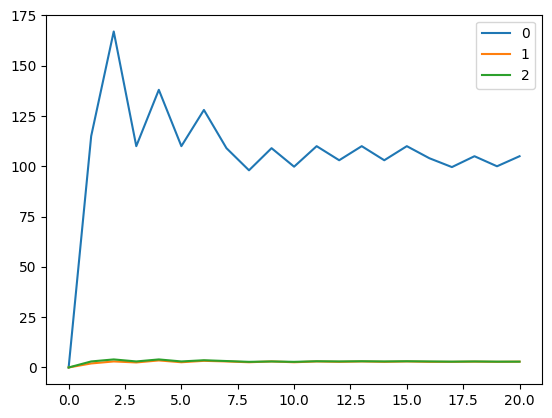

In [ ]:
cpu_load_by_cpu.plot()

## Выкидываем оптимизацию -O3

In [ ]:
lab3_4thread_sched_guided1_vals_unopt = {325: [19],
 1962: [157],
 3600: [359],
 5237: [766],
 6875: [1470],
 8512: [1690],
 10150: [2490],
 11787: [3367],
 13425: [5434],
 15062: [5811],
 16700: [6345]}

lab3_par4_sched_guided1_default_av_unopt, _, _ = plot_performance(lab3_4thread_sched_guided1_vals_unopt, baseline=lab1_seq_av, n_threads=4)


lab3_4thread_sched_guided4_vals_unopt = {325: [18],
 1962: [158],
 3600: [340],
 5237: [811],
 6875: [1544],
 8512: [1601],
 10150: [2272],
 11787: [3299],
 13425: [4976],
 15062: [6170],
 16700: [6249]}

lab3_par4_sched_guided4_default_av_unopt, _, _ = plot_performance(lab3_4thread_sched_guided4_vals_unopt, baseline=lab1_seq_av, n_threads=4)

lab3_4thread_sched_guided6_vals_unopt = {325: [17],
 1962: [149],
 3600: [382],
 5237: [791],
 6875: [1369],
 8512: [1799],
 10150: [2587],
 11787: [3227],
 13425: [5669],
 15062: [6119],
 16700: [6374]}

lab3_par4_sched_guided6_default_av_unopt, _, _ = plot_performance(lab3_4thread_sched_guided6_vals_unopt, baseline=lab1_seq_av, n_threads=4)


,N,"time, ms"
0,325,19.0
1,1962,157.0
2,3600,359.0
3,5237,766.0
4,6875,1470.0
5,8512,1690.0
6,10150,2490.0
7,11787,3367.0
8,13425,5434.0
9,15062,5811.0


,N,k
0,325.0,0.385965
1,1962.0,0.593949
2,3600.0,0.756267
3,5237.0,0.702350
4,6875.0,0.641837
5,8512.0,0.825444
6,10150.0,0.780020
7,11787.0,0.723344
8,13425.0,0.617501
9,15062.0,0.719799


,N,k
0,325.0,0.096491
1,1962.0,0.148487
2,3600.0,0.189067
3,5237.0,0.175587
4,6875.0,0.160459
5,8512.0,0.206361
6,10150.0,0.195005
7,11787.0,0.180836
8,13425.0,0.154375
9,15062.0,0.179950


,N,"time, ms"
0,325,18.0
1,1962,158.0
2,3600,340.0
3,5237,811.0
4,6875,1544.0
5,8512,1601.0
6,10150,2272.0
7,11787,3299.0
8,13425,4976.0
9,15062,6170.0


,N,k
0,325.0,0.407407
1,1962.0,0.590190
2,3600.0,0.798529
3,5237.0,0.663379
4,6875.0,0.611075
5,8512.0,0.871330
6,10150.0,0.854864
7,11787.0,0.738254
8,13425.0,0.674337
9,15062.0,0.677917


,N,k
0,325.0,0.101852
1,1962.0,0.147547
2,3600.0,0.199632
3,5237.0,0.165845
4,6875.0,0.152769
5,8512.0,0.217833
6,10150.0,0.213716
7,11787.0,0.184564
8,13425.0,0.168584
9,15062.0,0.169479


,N,"time, ms"
0,325,17.0
1,1962,149.0
2,3600,382.0
3,5237,791.0
4,6875,1369.0
5,8512,1799.0
6,10150,2587.0
7,11787,3227.0
8,13425,5669.0
9,15062,6119.0


,N,k
0,325.0,0.431373
1,1962.0,0.625839
2,3600.0,0.710733
3,5237.0,0.680152
4,6875.0,0.689189
5,8512.0,0.775431
6,10150.0,0.750773
7,11787.0,0.754726
8,13425.0,0.591903
9,15062.0,0.683568


,N,k
0,325.0,0.107843
1,1962.0,0.156460
2,3600.0,0.177683
3,5237.0,0.170038
4,6875.0,0.172297
5,8512.0,0.193858
6,10150.0,0.187693
7,11787.0,0.188681
8,13425.0,0.147976
9,15062.0,0.170892


In [ ]:
combine_and_compare_plot({
                          'Никак': lab3_par4_sched_guided1_default_av_unopt,
                          '-O3': lab3_par4_sched_guided1_default_av,
                         },
                         x_name='N',
                         y_name='time, ms',
                         class_field_name='Оптимизированность',
                         title='Сравнение времени выполнения для разных уровней оптимизации'
)

## Смотрим ускорение

In [ ]:
m0 = {
      10: [0.00001],
      50: [0.00001],
      100: [0.00001],
      200: [3],
      300: [4],
}

m0_av = plot_performance(m0)

m1 = {
      10: [0],
      50: [1],
      100: [2],
      200: [4],
      300: [9],
}

m1_av, _, _ = plot_performance(m1, baseline=m0_av, n_threads=1)


m2 = {
      10: [0],
      50: [2],
      100: [5],
      200: [6],
      300: [10],
}

m2_av, _, _ = plot_performance(m2, baseline=m0_av, n_threads=2)

m3 = {
      10: [2],
      50: [2],
      100: [2],
      200: [8],
      300: [6],
}

m3_av, _, _ = plot_performance(m3, baseline=m0_av, n_threads=3)

m4 = {
      10: [1],
      50: [4],
      100: [4],
      200: [6],
      300: [9],
}

m4_av, _, _ = plot_performance(m4, baseline=m0_av, n_threads=4)

,N,"time, ms"
0,10,0.00001
1,50,0.00001
2,100,0.00001
3,200,3.00000
4,300,4.00000


,N,"time, ms"
0,10,0.0
1,50,1.0
2,100,2.0
3,200,4.0
4,300,9.0


<ipython-input-4-5cfe2838e2e0>:14: RuntimeWarning:

divide by zero encountered in double_scalars



,N,k
0,10.0,inf
1,50.0,0.000010
2,100.0,0.000005
3,200.0,0.750000
4,300.0,0.444444


,N,k
0,10.0,inf
1,50.0,0.000010
2,100.0,0.000005
3,200.0,0.750000
4,300.0,0.444444


,N,"time, ms"
0,10,0.0
1,50,2.0
2,100,5.0
3,200,6.0
4,300,10.0


<ipython-input-4-5cfe2838e2e0>:14: RuntimeWarning:

divide by zero encountered in double_scalars



,N,k
0,10.0,inf
1,50.0,0.000005
2,100.0,0.000002
3,200.0,0.500000
4,300.0,0.400000


,N,k
0,10.0,inf
1,50.0,0.000003
2,100.0,0.000001
3,200.0,0.250000
4,300.0,0.200000


,N,"time, ms"
0,10,2.0
1,50,2.0
2,100,2.0
3,200,8.0
4,300,6.0


,N,k
0,10.0,0.000005
1,50.0,0.000005
2,100.0,0.000005
3,200.0,0.375000
4,300.0,0.666667


,N,k
0,10.0,0.000002
1,50.0,0.000002
2,100.0,0.000002
3,200.0,0.125000
4,300.0,0.222222


,N,"time, ms"
0,10,1.0
1,50,4.0
2,100,4.0
3,200,6.0
4,300,9.0


,N,k
0,10.0,0.000010
1,50.0,0.000003
2,100.0,0.000003
3,200.0,0.500000
4,300.0,0.444444


,N,k
0,10.0,2.500000e-06
1,50.0,6.250000e-07
2,100.0,6.250000e-07
3,200.0,1.250000e-01
4,300.0,1.111111e-01


In [ ]:
combine_and_compare_plot({
                          '1 потока': m1_av,
                          '2 потока': m2_av,
                          '3 потока': m3_av,
                          '4 потока': m4_av,
                         },
                         x_name='N',
                         y_name='time, ms',
                         class_field_name='Кол-во потоков',
                         title='Сравнение времени выполнения для мальеньких N'
)